# Assignment 1: Data Manipulation
Saana Vallius 19.1.2018

## Exercise 1

In [2]:
#Initial testing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.Series([5,2,7])
print(data)

0    5
1    2
2    7
dtype: int64


## Exercise 2

In [3]:
#Insert the table and turn into a dataframe
data = {'weight':[92,70,58,99,55,76,62,92,71,70,77,79],'exercise':[6,6,6,2,8,4,6,6,5,6,4,4],
        'cholesterol':[4.8,5.1,6.4,6.5,2.3,5.7,4.2,6.9,4.8,4.8,7.7,5.7],'income':[2060,2660,2530,1740,3520,3750,2720,3130,2100,3340,2430,2700],
       'happiness':[49,36,49,28,77,55,43,39,54,29,53,47],
        "birthyear":[1953,1955,1939,1942,1989,1937,1979,1905,1995,1966,1938,1993]}

df = pd.DataFrame(data)
df

,birthyear,cholesterol,exercise,happiness,income,weight
0,1953,4.8,6,49,2060,92
1,1955,5.1,6,36,2660,70
2,1939,6.4,6,49,2530,58
3,1942,6.5,2,28,1740,99
4,1989,2.3,8,77,3520,55
5,1937,5.7,4,55,3750,76
6,1979,4.2,6,43,2720,62
7,1905,6.9,6,39,3130,92
8,1995,4.8,5,54,2100,71
9,1966,4.8,6,29,3340,70


In [4]:
#Print basic statistics
res = df.describe()
df.describe()

,birthyear,cholesterol,exercise,happiness,income,weight
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1957.583333,5.408333,5.250000,46.583333,2723.333333,75.083333
std,27.566311,1.419000,1.544786,13.283334,614.807188,13.813421
min,1905.000000,2.300000,2.000000,28.000000,1740.000000,55.000000
25%,1938.750000,4.800000,4.000000,38.250000,2347.500000,68.000000
50%,1954.000000,5.400000,6.000000,48.000000,2680.000000,73.500000
75%,1981.500000,6.425000,6.000000,53.250000,3182.500000,82.250000
max,1995.000000,7.700000,8.000000,77.000000,3750.000000,99.000000


In [6]:
#Calculate and print income data based on mean value
ave_income = res['income']['mean']
row = 1

for value in df.income:
    if value > ave_income:
        print('Person' + str(row) + ': above average income.')
    else:
        print('Person' + str(row) + ': below average income.')
    row = row+1

Person1: below average income.
Person2: below average income.
Person3: below average income.
Person4: below average income.
Person5: above average income.
Person6: above average income.
Person7: below average income.
Person8: above average income.
Person9: below average income.
Person10: above average income.
Person11: below average income.
Person12: below average income.


# Exercise 3

In [5]:
#Read the CSV file
table = pd.read_csv('kd.csv', na_values='?')

#Check types
table.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wbcc      object
rbcc      object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [6]:
#Turn faulty, non-numeric values into a numeric type and check types again
table['pcv']=pd.to_numeric(table['pcv'], errors="coerce")
table['wbcc']=pd.to_numeric(table['wbcc'], errors="coerce")
table['rbcc']=pd.to_numeric(table['rbcc'], errors="coerce")

table.dtypes
#Now all the wanted columns can be used in calculations

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [7]:
#Select affected patients only
affected = table[table['class']=="ckd"]

#Show basic statisctics
affected.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,240.00000,238.000000,207.000000,208.000000,205.000000,210.000000,235.000000,236.000000,166.000000,165.000000,203.000000,182.000000,149.000000,125.000000
mean,54.42500,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217,32.967033,9081.208054,3.956800
std,17.41142,15.244756,0.004630,1.375821,1.350788,92.476413,58.722957,6.977209,12.461811,4.347562,2.190174,7.219450,3600.025697,0.858951
min,2.00000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.500000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,47.00000,70.000000,1.010000,0.000000,0.000000,106.250000,32.000000,1.400000,132.000000,3.800000,9.450000,29.000000,6700.000000,3.400000
50%,59.00000,80.000000,1.015000,2.000000,0.000000,143.500000,53.000000,2.250000,136.000000,4.300000,10.900000,33.000000,8800.000000,3.900000
75%,66.00000,90.000000,1.015000,3.000000,1.000000,219.750000,93.500000,4.600000,139.000000,4.900000,12.050000,37.000000,10700.000000,4.400000
max,90.00000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,16.100000,52.000000,26400.000000,8.000000


In [8]:
#Select numerical values only (defined as 'numerical' in the text file)
numerical = affected.filter(items=['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

#Calculate pairwise correlation coefficients
correlations = numerical.corr()
correlations

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.144122,0.160216,0.132041,0.079386,-0.026924,0.058805,-0.077130,-0.129866,0.058704,-0.047071
bp,0.144122,1.000000,0.046097,0.098726,0.066857,0.020953,0.058271,-0.152156,-0.166922,-0.042817,0.046037
bgr,0.160216,0.046097,1.000000,-0.031664,-0.052850,-0.081869,0.029192,0.103096,0.099736,0.037984,0.187873
bu,0.132041,0.098726,-0.031664,1.000000,0.542260,-0.191726,0.368048,-0.568305,-0.561046,-0.067338,-0.473242
sc,0.079386,0.066857,-0.052850,0.542260,1.000000,-0.679324,0.330104,-0.277334,-0.283325,-0.100845,-0.281052
sod,-0.026924,0.020953,-0.081869,-0.191726,-0.679324,1.000000,0.185381,0.126338,0.149251,0.107798,0.132111
pot,0.058805,0.058271,0.029192,0.368048,0.330104,0.185381,1.000000,-0.159433,-0.192552,-0.162658,-0.173664
hemo,-0.077130,-0.152156,0.103096,-0.568305,-0.277334,0.126338,-0.159433,1.000000,0.948612,0.077636,0.785428
pcv,-0.129866,-0.166922,0.099736,-0.561046,-0.283325,0.149251,-0.192552,0.948612,1.000000,-0.012407,0.796993
wbcc,0.058704,-0.042817,0.037984,-0.067338,-0.100845,0.107798,-0.162658,0.077636,-0.012407,1.000000,0.053170


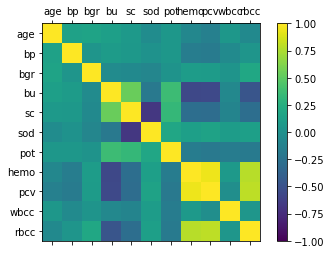

In [9]:
#Plot the correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(correlations))
ax.set_yticklabels(list(correlations))
plt.show()